In [16]:
import warnings
warnings.filterwarnings('ignore')
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('setup completetd!')

setup completetd!


In [17]:
df =pd.read_csv(r'C:\Users\SH2\Downloads\archive (27)\Food Prices.csv')

In [18]:
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [19]:
df.shape

(1200, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1200 non-null   object 
 1   Year                 1200 non-null   int64  
 2   Month                1200 non-null   int64  
 3   Food Item            1200 non-null   object 
 4   Unit of Measurement  1200 non-null   object 
 5   Average Price        1200 non-null   float64
 6   Currency             1200 non-null   object 
 7   Price in USD         1200 non-null   float64
 8   Availability         1200 non-null   int64  
 9   Quality              1200 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.9+ KB


In [21]:
df.isnull().sum()

Country                0
Year                   0
Month                  0
Food Item              0
Unit of Measurement    0
Average Price          0
Currency               0
Price in USD           0
Availability           0
Quality                0
dtype: int64

In [33]:
df.columns = df.columns.str.strip()

In [38]:
df.Year.value_counts()

2018    240
2019    240
2020    240
2021    240
2022    240
Name: Year, dtype: int64

In [40]:
df['Food Item'].value_counts()

Bread       300
Milk        300
Eggs        300
Potatoes    300
Name: Food Item, dtype: int64

In [41]:
df['Country'].value_counts()

Australia       240
Sweden          240
Japan           240
South Africa    240
Canada          240
Name: Country, dtype: int64

In [43]:
df['Unit of Measurement'].value_counts()

1 Kg            360
Loaf            300
Carton of 12    300
1 L             240
Name: Unit of Measurement, dtype: int64

In [44]:
df['Currency'].value_counts()

AUD     240
Kr      240
JPY     240
ZAR     240
CAD     240
Name: Currency, dtype: int64

In [45]:
df.Quality.value_counts()

High      960
Medium    240
Name: Quality, dtype: int64

In [46]:
df.tail()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
1195,Canada,2022,8,Potatoes,1 Kg,3.17,CAD,2.41,1,High
1196,Canada,2022,9,Potatoes,1 Kg,3.18,CAD,2.42,1,High
1197,Canada,2022,10,Potatoes,1 Kg,3.20,CAD,2.43,1,High
1198,Canada,2022,11,Potatoes,1 Kg,3.21,CAD,2.44,1,High
1199,Canada,2022,12,Potatoes,1 Kg,3.22,CAD,2.45,1,High


Text(0, 0.5, 'Average Price')

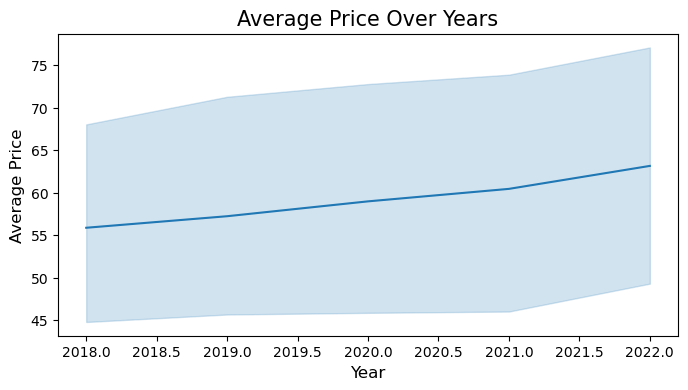

In [57]:
plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(x='Year' ,y ='Average Price',data = df)
plt.title('Average Price Over Years',size=15)
plt.xlabel('Year',size=12)
plt.ylabel('Average Price',size=12)

Text(0, 0.5, 'Average Price')

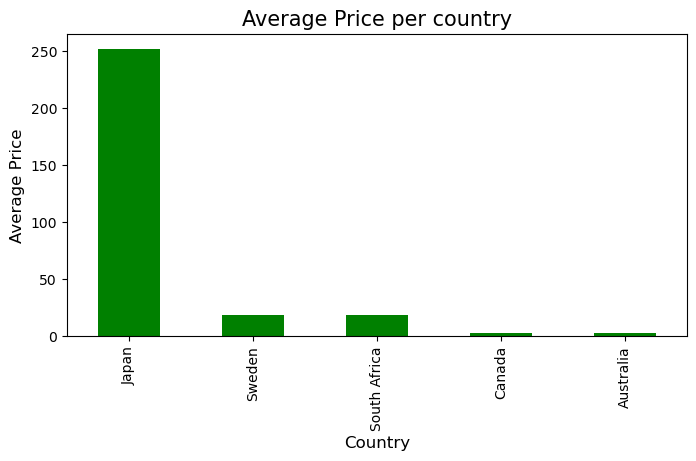

In [67]:
plt.figure(figsize=(8,4),dpi=100)
avg_price_per_con = df.groupby('Country')['Average Price'].mean().sort_values(ascending =False).plot(kind='bar',color='green')
plt.title('Average Price per country',size=15)
plt.xlabel('Country',size=12)
plt.ylabel('Average Price',size=12)

Text(0, 0.5, 'Frequency')

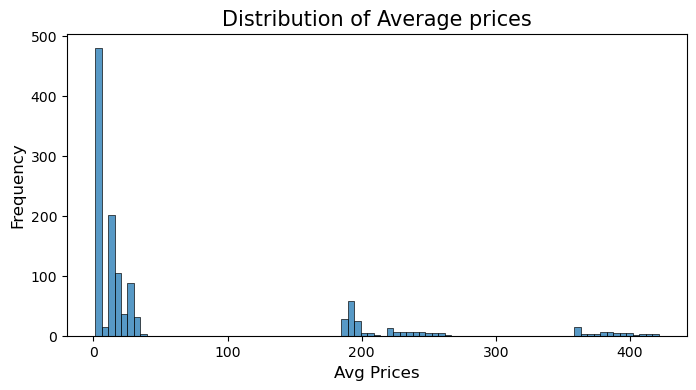

In [70]:
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(x= df['Average Price'])
plt.title('Distribution of Average prices',size=15)
plt.xlabel('Avg Prices',size=12)
plt.ylabel('Frequency',size=12)

In [76]:
pd.pivot_table(df,
               values=['Average Price','Price in USD','Availability'], index=['Country']
               ,aggfunc='mean').round(2)

,Availability,Average Price,Price in USD
Country,,,
Australia,1,2.87,1.93
Canada,1,3.15,2.39
Japan,1,252.09,1.81
South Africa,1,18.76,1.04
Sweden,1,18.78,1.84


In [81]:
pd.pivot_table(df,
               values=['Average Price','Price in USD','Availability'], index=['Food Item']
               ,aggfunc='mean').round(2)

,Availability,Average Price,Price in USD
Food Item,,,
Bread,1,47.18,1.64
Eggs,1,60.88,2.38
Milk,1,44.48,1.27
Potatoes,1,83.98,1.92


In [82]:
pd.pivot_table(df,
               values=['Average Price','Price in USD','Availability'], index=['Currency']
               ,aggfunc='mean').round(2)

,Availability,Average Price,Price in USD
Currency,,,
AUD,1,2.87,1.93
CAD,1,3.15,2.39
JPY,1,252.09,1.81
Kr,1,18.78,1.84
ZAR,1,18.76,1.04


In [83]:
df.Availability.unique()

array([1], dtype=int64)

In [86]:
pd.pivot_table(df,
               values=['Average Price','Price in USD'], index=['Quality']
               ,aggfunc='mean').round(2)

,Average Price,Price in USD
Quality,,
High,69.22,1.99
Medium,18.76,1.04


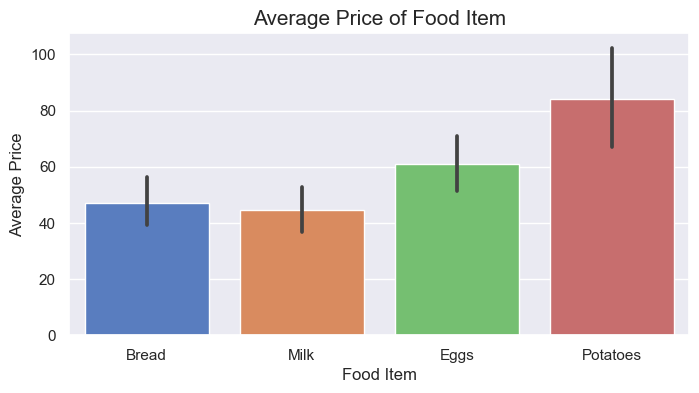

In [89]:
plt.figure(figsize=(8,4),dpi=100)
sns.set(palette = 'muted')
sns.barplot(x='Food Item', y ='Average Price',data = df)
plt.xlabel('Food Item',size=12)
plt.ylabel('Average Price',size=12)
plt.title('Average Price of Food Item',size=15)
plt.show()

In [96]:
pd.pivot_table(df,
               values=['Average Price','Price in USD'], index=['Unit of Measurement']
               ,aggfunc='mean').round(2)

,Average Price,Price in USD
Unit of Measurement,,
1 Kg,70.41,1.92
1 L,54.95,1.10
Carton of 12,60.88,2.38
Loaf,47.18,1.64


<AxesSubplot:xlabel='Unit of Measurement'>

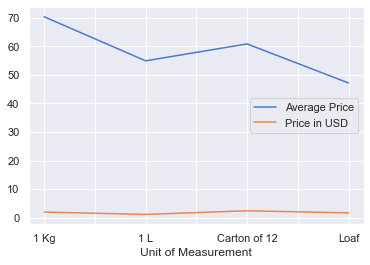

In [98]:
pd.pivot_table(df,
               values=['Average Price','Price in USD'], index=['Unit of Measurement']
               ,aggfunc='mean').round(2).plot()

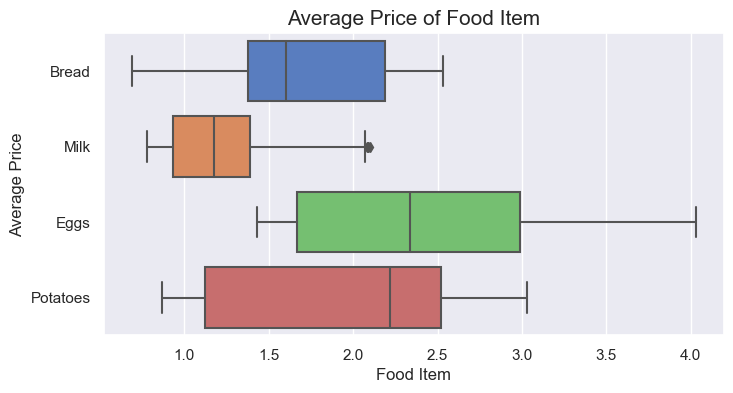

In [118]:
plt.figure(figsize=(8,4),dpi=100)
sns.set(palette = 'muted')
sns.boxplot(y='Food Item', x ='Price in USD',data = df)
plt.xlabel('Food Item',size=12)
plt.ylabel('Average Price',size=12)
plt.title('Average Price of Food Item',size=15)
plt.show()

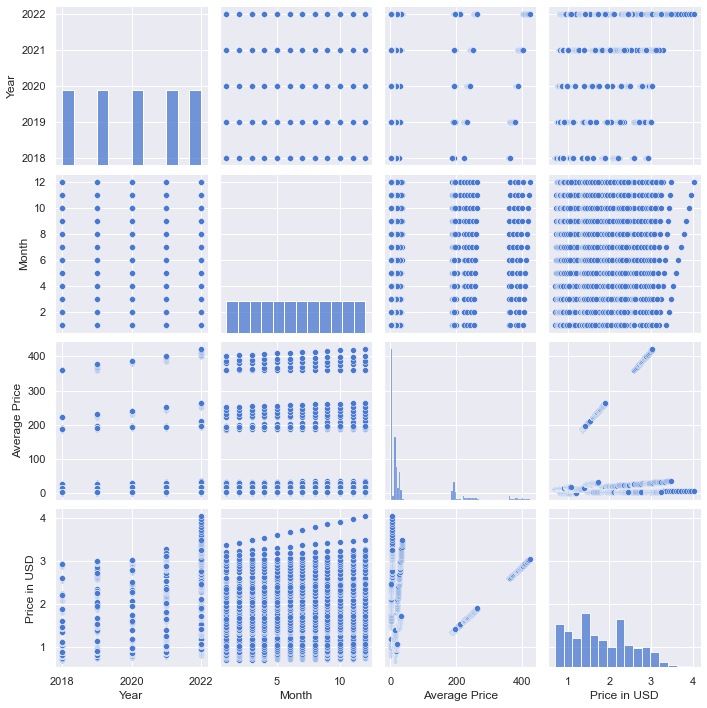

In [101]:
sns.pairplot(df)

Text(0.5, 1.0, 'Average Prices Over Months')

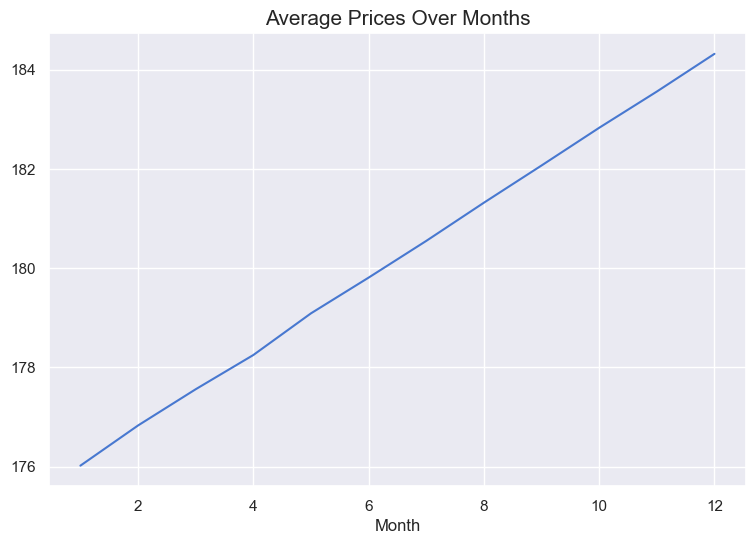

In [111]:
plt.figure(figsize=(9,6),dpi=100)
df.groupby('Month')['Price in USD'].sum().sort_values(ascending =False).plot()
plt.title('Average Prices Over Months',size =15)

Text(0, 0.5, 'Frequency')

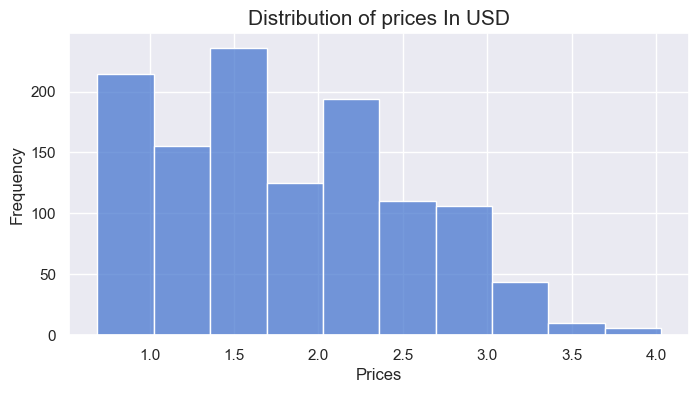

In [115]:
plt.figure(figsize=(8,4),dpi=100)
sns.histplot(x= df['Price in USD'],bins =10)
plt.title('Distribution of prices In USD',size=15)
plt.xlabel('Prices',size=12)
plt.ylabel('Frequency',size=12)

<AxesSubplot:>

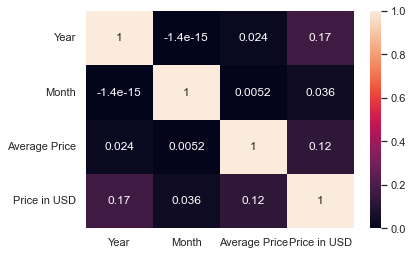

In [116]:
sns.heatmap(df.corr(),annot = True)

In [117]:
from pivottablejs import pivot_ui
pivot_ui(df)